# Data Wrangling & EDA

This notebooks contains my exploration of the dataset, initial cleaning, and some visualizations to better understand the dataset.  The product of this notebook will be a working dataset that can be used for preprocessing and modeling.

------

## Contents<a id='Contents'></a>
* [Introduction & Feature Descriptions](#introduction--feature-descriptions)
* [Imports & Reading/Preparing Data](#imports--readingpreparing-data)
---

### Introduction & Feature Descriptions

**Introduction will be added here**

**Features:**  
 * *fixed acidity:* most acids involved with wine or fixed or nonvolatile (do not evaporate readily)  
 * *volatile acidity:* the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste  
 * *citric acid:* found in small quantities, citric acid can add 'freshness' and flavor to wines  
 * *residual sugar:* the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet  
 * *chlorides:* the amount of salt in the wine  
 * *free sulfur dioxide:* the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine  
 * *total sulfur dioxide:* amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine  
 * *density:* the density of water is close to that of water depending on the percent alcohol and sugar content  
 * *pH:* describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale  
 * *sulphates:* a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant  
 * *alcohol:* the percent alcohol content of the wine  
 * *quality:* output variable (based on sensory data, score between 0 and 10)

### Imports & Reading/Preparing Data

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns',None)
plt.style.use('ggplot')
import os

In [2]:
# Read red wine csv into a pandas dataframe
red_data = pd.read_csv('../data/winequality-red.csv')
red_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Read white wine csv into a pandas dataframe
white_data = pd.read_csv('../data/winequality-white.csv', sep=';')
white_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


There are 11 predictor variables and one target variable (quality).

In [4]:
red_data.shape

(1599, 12)

There are 1599 red wines with 12 features.

In [5]:
white_data.shape

(4898, 12)

There are 4898 white wines with 12 features

In [6]:
# Confirm the two dataframes have the same column names
red_data.columns == white_data.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [7]:
red_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No missing date in the red wine dataset.  The datatypes look correct as well.

In [8]:
white_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


No missing date in the white wine dataset.  The datatypes look correct as well.

In [9]:
# Add columnn to identify Red vs. White and merge dataframes
red_data['type'] = 'Red'
white_data['type'] = 'White'
wine_data = pd.concat([red_data, white_data], axis=0, ignore_index=True)
wine_data.shape

(6497, 13)

In [10]:
# Assign labels to the type feature (0 = red wine, 1 = white wine)
label_type = LabelEncoder()
wine_data['type'] = label_type.fit_transform(wine_data['type'])
wine_data['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [11]:
# Reorder columns
cols =['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
wine_data = wine_data[cols]

---

### EDA

In [12]:
# Generate descriptive statistics of each feature
wine_data.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


* It seems that the minimum and maximum values for many of the columns lie more than two standard deviations from the mean suggesting they may be outliers.
* Also note that ~75% of the data is for white wine

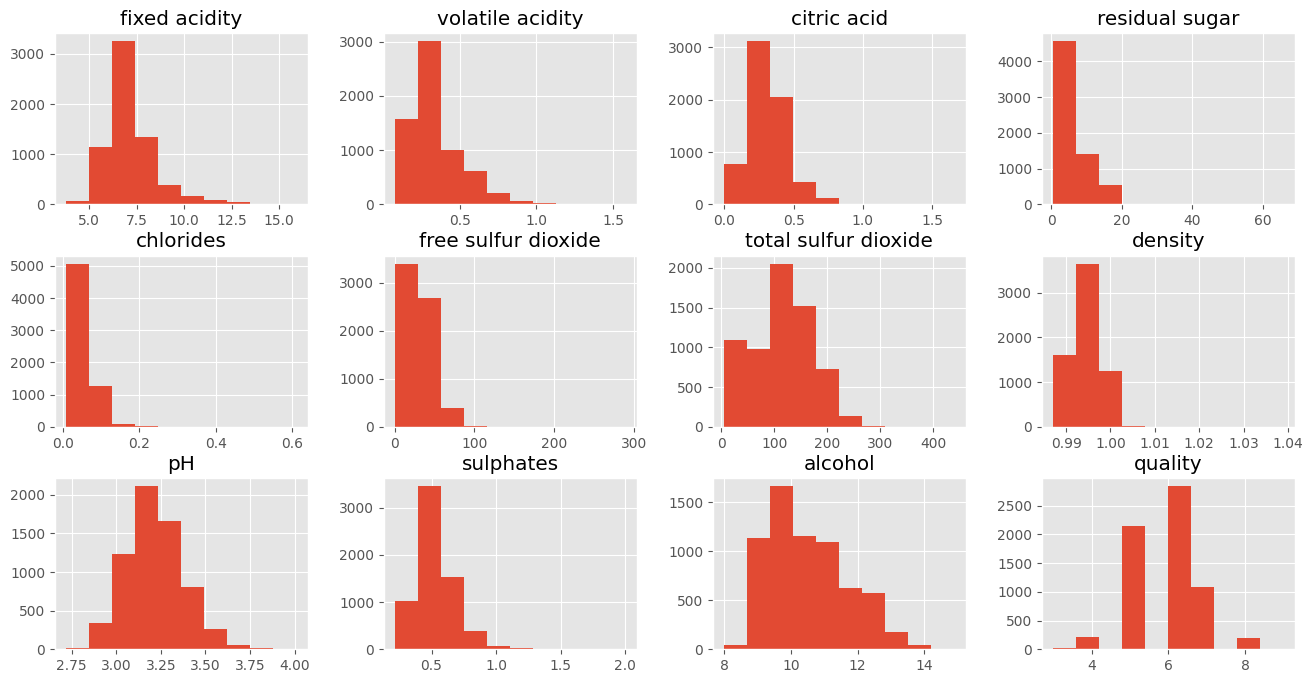

In [13]:
# Plot histograms for all features except type
hist = wine_data.drop('type', axis=1).hist(layout=(3,4), figsize=(16,8))

Most of the features are left skewed  
Most of the data points have a quality between 5 and 7.  With the target feature so bunched around its mean, it may be difficult to predict values in either extreme (quality < 5 or quality > 7).

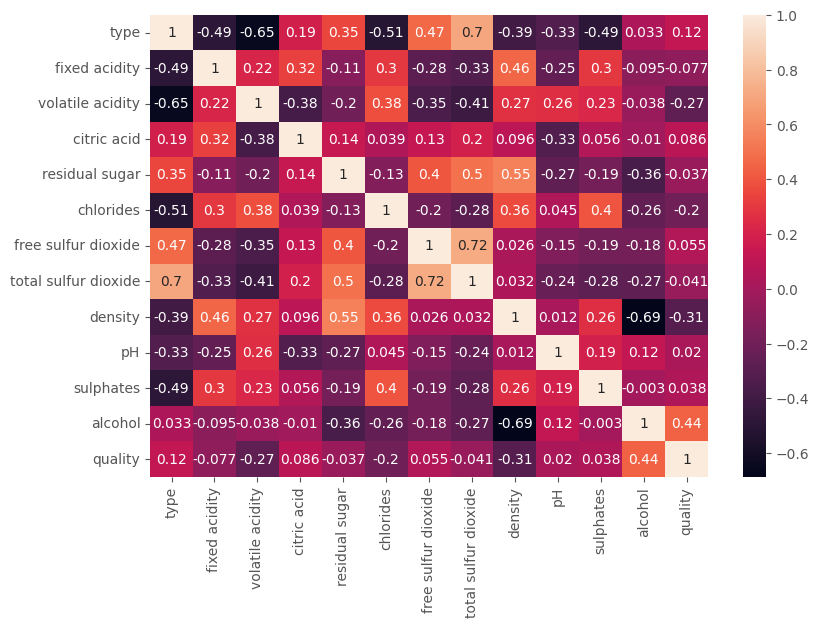

In [14]:
plt.figure(figsize=(9,6))
sns.heatmap(wine_data.corr(), annot=True)
plt.show()

The largest correlations are between a wine's free sulfur dioxide and total sulfur dioxide, a wine's type and its total sulfur dioxide, and a wine's density and its alcohol content. The most significant correlation between a feature and the target variable is 0.44 (alcohol content).

I will plot the features with the highest correlation to quality. I am also interested to see if wine type (red or white) has a significant impact on quality.

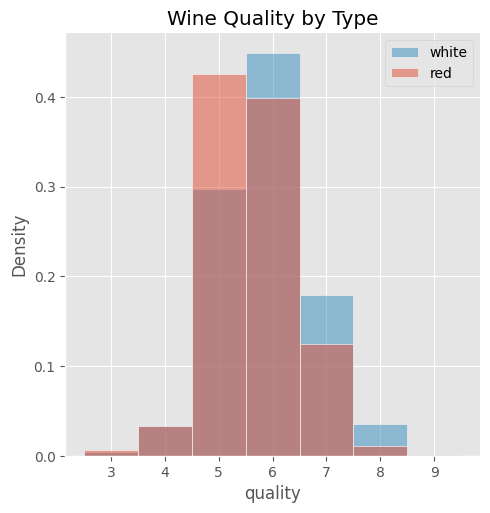

In [15]:
arr = np.arange(2.5, 10.5, 1)
box = sns.displot(data = wine_data, x = 'quality', bins = arr, hue = 'type', stat = 'density', common_norm=False, legend=False)
plt.legend(['white', 'red'])
plt.title('Wine Quality by Type')
plt.show()

White wine has a slightly higher mean, but wine type is not a clear indicator of quality. 

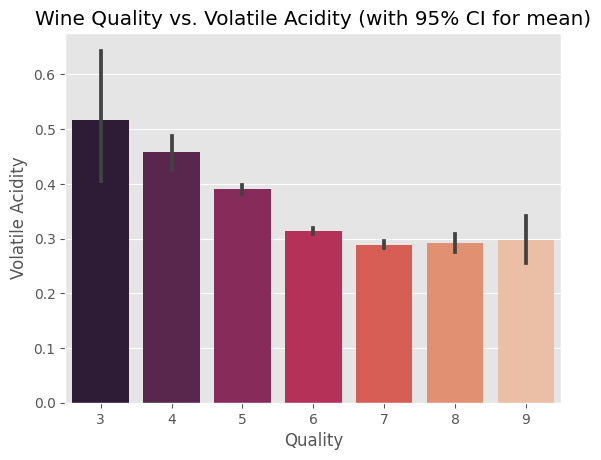

In [16]:
# Plot volatile acidity vs. quality
fig = sns.barplot(data=wine_data, x = 'quality', y = 'volatile acidity', palette=sns.color_palette('rocket', n_colors=7))
plt.title('Wine Quality vs. Volatile Acidity (with 95% CI for mean)')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

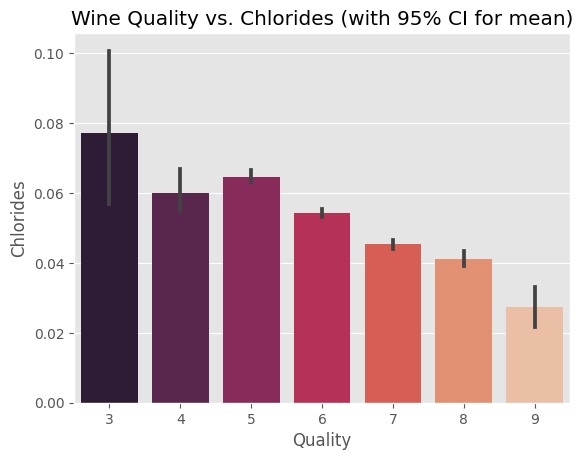

In [17]:
# Plot chlorides vs. quality
fig = sns.barplot(data=wine_data, x = 'quality', y = 'chlorides', palette=sns.color_palette('rocket', n_colors=7))
plt.title('Wine Quality vs. Chlorides (with 95% CI for mean)')
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.show()

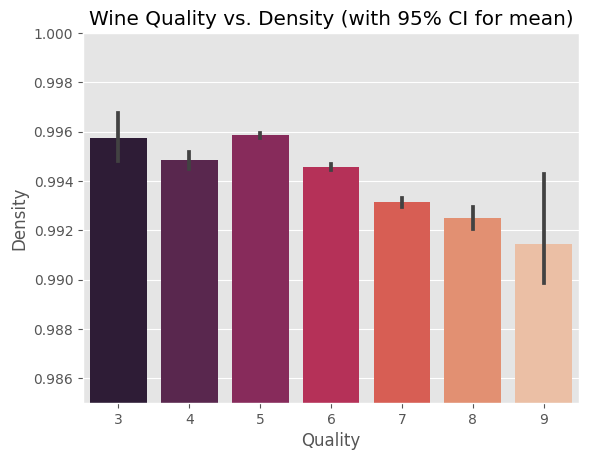

In [18]:
# Plot density vs. quality
fig = sns.barplot(data=wine_data, x = 'quality', y = 'density', palette=sns.color_palette('rocket', n_colors=7))
plt.ylim([0.985, 1])
plt.title('Wine Quality vs. Density (with 95% CI for mean)')
plt.xlabel('Quality')
plt.ylabel('Density')
plt.show()

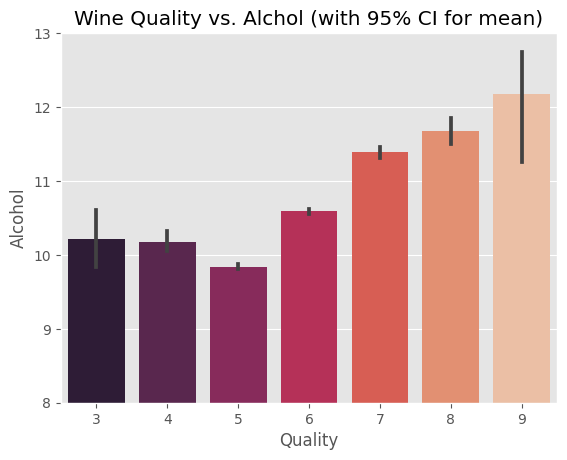

In [19]:
# Plot alcohol vs. quality
fig = sns.barplot(data=wine_data, x = 'quality', y = 'alcohol', palette=sns.color_palette('rocket', n_colors=7))
plt.ylim([8, 13])
plt.title('Wine Quality vs. Alchol (with 95% CI for mean)')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

It is clear that there is no single feature that can be used alone to predict wine quality.  
Now I will observe interactions between features.

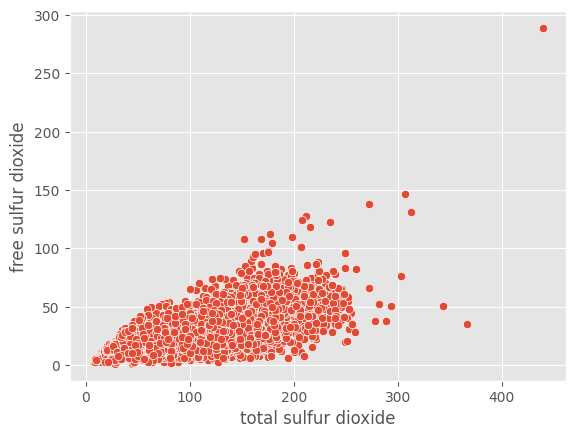

In [20]:
# Plot total sulfur dioxide vs. free sulfur dioxide
fig = sns.scatterplot(data=wine_data, x = 'total sulfur dioxide', y = 'free sulfur dioxide')

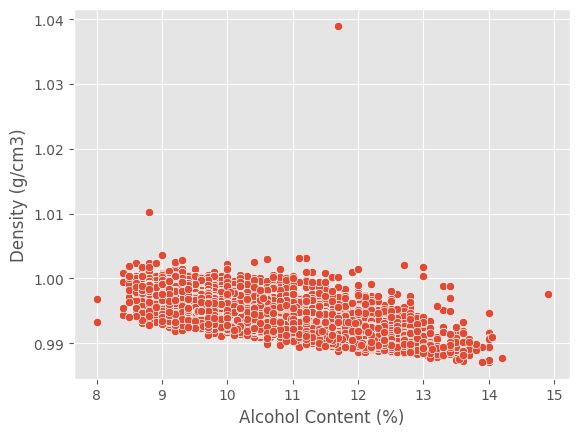

In [21]:
# Plot alcohol vs. density
fig = sns.scatterplot(data=wine_data, x = 'alcohol', y = 'density')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Density (g/cm3)')
plt.show()

---

### Data Export

This is the dataset that will be used for preprocessing and modeling:

In [22]:
# Export wine_data as a csv for next steps
wine_data.to_csv('../data/wine_data_features.csv', index=False)